***`Linear regression`*** is a statistical approach for modelling relationship between a `dependent variable (Y)` with a given set of `independent variables (X_i)`.

Note: In this article,
- 1) we refer `dependent variables as response` and `independent variables as features` for simplicity.
- 2) we focus on `simple linear regression` (as a simple case) then `multiple linear regression`

**`Simple linear regression.`** is an approach for predicting a response using a single feature.

It is assumed that the two variables are linearly related. Hence, we try to find a linear function that predicts the response value(y) as accurately as possible as a function of the feature or independent variable(x)

$$ Y_i = X_i + \xi_i, \quad \forall i = 1, \ldots, n $$

where $Y_i, X_i$ be the $i^{th}-$observation of the `respone(y)` and the `feature(x)` respectively. The $\xi_i$ be supposed the independent `random noise`.

Now, our problem is to find a `line which fits best` for the `scatter plot (of the pair (x_i, y_i))` so that we can predict the response for any new feature values. (i.e a value of x not present in dataset). This line is called ***`regression line`*** and will be represented as:

$$ \hat{Y}_i = \phi(X_i) = \beta_0 + \beta_1 X_i , \quad \forall i = 1, \ldots, n.$$

Here,
- $\hat{Y}_i $ represents the `predicted response value` for $i^{th}$ observation.
- $\beta_0, \beta_1$ be called the `regression coefficients` and represent the `intercept` and `slope` of regression line respectively. 

Then, we will estimate the values of `regression coefficients` by using the trick `Least Squares technique`. Now we will consider the `residual error` defined as
$$ \hat{\xi}_i = \hat{Y}_i - Y_i $$
According to the `Least Squares technique`, we will minimize the loss function defined by
$$ L(\beta_0, \beta_1) = \sum_{i=1}^n \hat{\xi}_i^2 = \sum_{i=1}^n \left( \beta_0 + \beta_1 x_i - y_i \right)^2 $$
and the `optimal solution` will be hold the equation

$$\left \lbrace \begin{array}{ccl} \dfrac{\partial L}{\partial \beta_0} &=& 0 \\ \dfrac{\partial L}{\partial \beta_1} &=& 0 \end{array} \right.$$

$$\Rightarrow\left \lbrace \begin{array}{ccl} \hat{\beta}_1 &=& \dfrac{S_{xy}}{S_{xx}} = \dfrac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} \\ \hat{\beta}_0 &=& \bar{y} - \hat{\beta}_1 \bar{x} \end{array} \right.$$

where $\bar{x} = n^{-1} \sum_{i=1}^n x_i$ and $\bar{y} = n^{-1} \sum_{i=1}^n y_i$.


**Example 1. Simple linear regression's application.** Here, we consider a dataset where we have a value of `response (y): weight (in pound)` and the `feature(x) : height (in inches)` from the dataset `weight-height.csv`.

Source : https://www.kaggle.com/mustafaali96/weight-height

Firstly, we study step by step the algorithm with the function in `scikit-learn` before comparing within `statsmodels.formula.api`

**Loading & viewing dataset.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## to evaluate the score on the test_set
from sklearn.metrics import mean_squared_error as mse, r2_score

## Loading dataset
df = pd.read_csv(r"C:\Users\Admin\Desktop\Nhan_pro\Data\ML\weight-height.csv")

## viewing the first 5 lines
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


**Assign the `respone` and `feature` to `x, y` then viewing its shape (or sample size)**

In [3]:
x = df['Height'].to_numpy()
y = df['Weight'].to_numpy()
x.shape, y.shape

((10000,), (10000,))

**Visualizing data via the `scatter plot`**

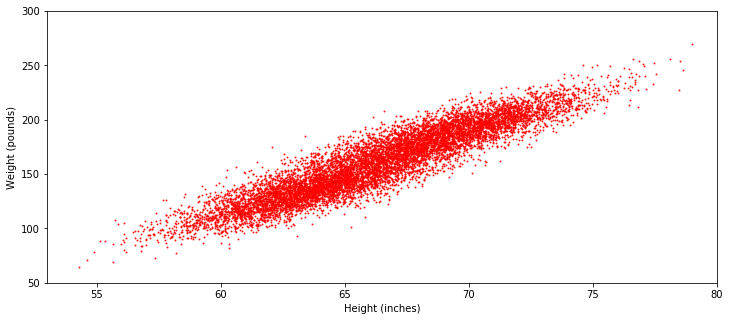

In [4]:
plt.figure(figsize = (12, 5))
plt.plot(x, y, 'r.', markersize = 2, alpha = 0.8)
plt.axis([53, 80, 50, 300])
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.show()

**Comments:**
- 1) This data set is not realistic at all for human weights and heights
- 2) Look at the `scatter plot`, we can see that the `data-points` are mostly concentrated on a linear function; we suppose that

$$ \text{(weight)}_i = \beta_0 + \beta_1 * \text{(height)}_i + \xi_i, \quad \forall i = 1, \ldots, n $$

or equivalent 

$$ \textbf{Y} = \textbf{X} \beta + \xi $$
where $\textbf{Y} = \left[ \begin{array}{c} Y_1 \\ Y_2 \\ \vdots \\ Y_n \end{array} \right]$, $\xi = \left[ \begin{array}{c} \xi_1 \\ \xi_2 \\ \vdots \\ \xi_n \end{array} \right]$, $\beta = \left[ \begin{array}{c} \beta_0 \\ \beta_1 \end{array} \right]$ and $\textbf{X} = \left( \begin{array}{cc} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{array} \right)$

Because the `LinearRegression` in the `sklearn.linear_model` understand **X** as a matrix (defined as above), so we will modify an `1D column_vector` to a matrix by adding a `column_vector` $1_n$

In [5]:
one = np.ones((x.shape[0], 1))
X = np.concatenate((one, x.reshape(-1,1)), axis = 1)

#### calculate the estimations of beta0 and beta1

In [6]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept = False) # fit_intercept = False for calculating the bias
lm.fit(X, y)

lm.coef_ 

array([-350.73719181,    7.71728764])

#### check again with step by step `calculation_formulation` . 

In [7]:
x_bar = np.mean(x)
y_bar = np.mean(y)
S_xx = np.sum((x - x_bar)**2)
S_xy = np.sum((x - x_bar)*(y-y_bar))

beta1_hat = S_xy / S_xx
beta0_hat = y_bar - beta1_hat * x_bar

print("est of beta1 :", beta1_hat)
print("est of beta0 :", beta0_hat)

est of beta1 : 7.717287640785389
est of beta0 : -350.737191812137


Hence, our results fit with the coefficients in the `preceding step`. Now, plot the `regression line` on the `scatter_plot`

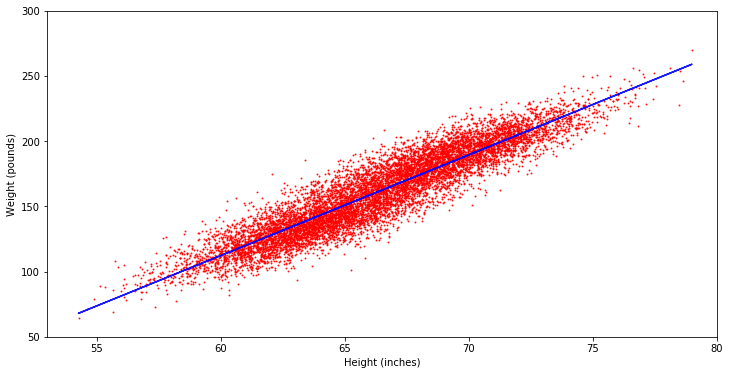

In [8]:
plt.figure(figsize = (12, 6))
pred = lm.predict(X)
plt.plot(x, y, 'r.', markersize = 2, alpha = 0.8)
plt.plot(x, pred, 'b', markersize = 4, alpha = 0.9)
plt.axis([53, 80, 50, 300])
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.show()

Finaly, we use the `train_test_split` and both criteria `mse, r2_score` to evaluate the `loss_function`.

In [9]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression(fit_intercept = False).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse,r2_score

print("training_MSE: ", mse(y_train, y_train_pred))
print("testing_MSE: ", mse(y_test, y_test_pred))

print("R2_training:", r2_score(y_train, y_train_pred))
print("R2_testing: ", r2_score(y_test, y_test_pred))

training_MSE:  149.3736986484211
testing_MSE:  149.00350418448133
R2_training: 0.8545053200432668
R2_testing:  0.8577317777038498


**Comments.**
- 1) `MSE` : is the average of the square of the errors. The larger the number the larger the error; In mathematic; it's defined by

$$ MSE = n^{-1} \sum_{k = 1}^n (Y_i - \hat{Y}_i)^2 $$

- 2) `R2_score` or also called the `coefficient of determination`; defined by

$$ R^2 = 1 - \dfrac{MSE}{Var(y)} $$

The `R2_score` varies in (0, 1). It is closely related to the `MSE`, but not the same. it is the `proportion of the variance in the dependent variable that is predictable from the independent variable(s).`  So if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all. A low value would show a low level of correlation, meaning a regression model that is not valid, but not in all cases.

Now, let's verify the formular!

In [10]:
print("Verifying .....")

## calculate the mse
mse_score_train = np.mean((y_train_pred - y_train)**2)
mse_score_test = np.mean((y_test_pred - y_test)**2)

## calculate the r2_score :
## for the training_set
## The total sum of squares (proportional to the variance of the data
S_tot_train = np.mean((y_train - np.mean(y_train))**2)

## The coefficient of determination; denoted r2_score
r2_train = 1 - (mse_score_train / S_tot_train)

## for the testing set
S_tot_test = np.mean((y_test - np.mean(y_test))**2)
r2_test = 1 - (mse_score_test / S_tot_test)

print("mse_train:", mse_score_train)
print("mse_test: " , mse_score_test)

print("r2_train:", r2_train)
print("r2_test:", r2_test)

Verifying .....
mse_train: 149.3736986484211
mse_test:  149.00350418448133
r2_train: 0.8545053200432668
r2_test: 0.8577317777038499


***In the remaining of this part, we will use the `statsmodels.formula.api` to verify the regression_coefficient in the preceding example!***

In [11]:
#!pip install statsmodels
from statsmodels.formula.api import ols

model = ols("Weight ~ Height", data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 5.904e+04
Date:                Sun, 12 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:18:15   Log-Likelihood:                -39219.
No. Observations:               10000   AIC:                         7.844e+04
Df Residuals:                    9998   BIC:                         7.846e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -350.7372      2.111   -166.109      0.000    -354.876    -346.598
Height         7.7173      0.032    242.975      0.000       7.655       7.780
==============================================================================
Omnibus:                        2.141   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                2.150
Skew:                           0.036   Prob(JB):                        0.341
Kurtosis:                       2.991   Cond. No.                     1.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looking at the above table, 
- The `intercept` explains $\hat{\beta}_0 = -350.7372$ and the `Height` is the `slope` or $\hat{\beta}_1 = 7.7173$
- The `r2_score` for whole dataset is about $0.855$
- The `AIC (Akaike Information Criterion)` is defined by
$$ \text{AIC} = 2 k - 2 LL $$

- The `BIC` is defined by
$$ \text{BIC} = k \log(n) - 2 LL $$
where:
- `LL` is the `log-likelihood` function from the model (look at the table, this term equals to `-39219`)
- `n` is the number of observations,
- `k` is the number of parameters estimated by the model. For example, in multiple linear regression, the estimated parameters included `the intercept`, the `slope parameters: p`, and the constant variance of the errors; thus, ${\displaystyle k = p + 2}$

Ref: 
- (AIC) https://en.wikipedia.org/wiki/Akaike_information_criterion
- (BIC) https://en.wikipedia.org/wiki/Bayesian_information_criterion

Now, let verify the formula again!

In [12]:
LL = -39219
k = 3
n = 10000
aic = 2*k - 2*LL
bic = k*np.log(n) -2*LL 
aic, bic

(78444, 78465.63102111593)

Following is some example for extracting information from the `summary_table`: https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.html

In [13]:
model.params  ## Regression_coef_
model.bse  ## Standard_errors
model.pvalues  ## p_values for each coef_s
model.f_pvalue  ## The p-value of the F-statistic.
model.aic, model.bic, model.llf  ## The criteria AIC, BIC and log-likelihood
model.tvalues
model.rsquared
model.rsquared_adj

0.8551597265851066

**In the finally section (of this topic), we will discuss the `multiple-linear-regression`**. 
`Multiple linear regression` attempts to model the relationship between two or more features and a response by fitting a linear equation to observed data. Clearly, it is nothing but an extension of Simple linear regression.

Here, we consider a dataset with *p* `features(or independent variables)` and  `1 response(or dependent variable)`. Also, the dataset contains n rows/observations. Now, the model can be writen as

$$ \textbf{Y} = \textbf{X} \beta + \xi $$

where 
$\textbf{Y} = \left[ \begin{array}{c} Y_1 \\ Y_2 \\ \vdots \\ Y_n \end{array} \right],$ $\xi = \left[ \begin{array}{c} \xi_1 \\ \xi_2 \\ \vdots \\ \xi_n \end{array} \right],$ $\beta = \left[ \begin{array}{c} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_p \end{array} \right]$ and $\textbf{X} = \left( \begin{array}{ccccc} 1 & x_{11} & x_{12} & \ldots & x_{1p} \\ 1 & x_{21} & x_{22} & \ldots & x_{2p} \\ \vdots & \vdots \\ 1 & x_{n1} & x_{n2} & \ldots & x_{np} \end{array} \right)$

- Recall that for $b$ ís a $p \times 1$ vector and $A$ is a $p \times p$ symmetric matrix; then

$$ \dfrac{\partial b^T x}{\partial x} = b, \quad \dfrac{\partial^2 x^T A x}{\partial x^T \partial x} = A^T 2Ax \text{ and } \dfrac{\partial A^T x + x^T A}{\partial x} = \dfrac{\partial 2 A x}{\partial x} = 2A $$

- Using `Least square technique again,` the loss function now is defined by

$$ L(\beta) = \xi^T \xi = \left( \textbf{Y} - \mathcal{X} \beta \right)^T \left( \textbf{Y} - \mathcal{X} \beta \right) = \textbf{Y}^T \textbf{Y} - \beta^T \textbf{X}^T \textbf{Y} - \textbf{Y}^T \textbf{X} \beta + \beta^T \textbf{X}^T \textbf{X} \beta $$

We have

$$ \dfrac{\partial L}{\partial \beta} = \dfrac{\partial \left( \textbf{Y}^T \textbf{Y} - 2 \beta^T \textbf{X}^T \textbf{Y} - + \beta^T \textbf{X}^T \textbf{X} \beta \right)}{\partial \beta} = -2 \textbf{X}^T \textbf{Y} + 2 \textbf{X}^T \textbf{X} \beta$$
and
$$ \dfrac{\partial^2 L}{\partial \beta \partial \beta^T} = 2 \textbf{X}^T \textbf{X}. $$

The matrix $\textbf{X}$ has full rank so the $\textbf{X}^T \textbf{X}$ is `positive define`, and hence, the `least square solution` $\hat{\beta}$ will be found as

$$ \displaystyle \hat{\beta} = \text{argmin}_{\beta} L(\beta) = \left( \textbf{X}^T \textbf{X} \right)^{-1} \textbf{X}^T \textbf{Y}  $$

**Example 2.** The dataset now is `tips.` `Food servers’ tips` in restaurants may be influenced by many factors, including the `nature` of the restaurant, `size` of the party, and `table locations` in the restaurant. 

Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. 

In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a `non-smoking` section to patrons who requested it. 

Each record includes a day and time, and taken together, they show the server’s work schedule.

***But, here! We consider the `multiple_linear_regression` with the `respone` is `tip` and the features are `total_bill` and `size` only!!***

$$ \text{(tip)}_i = \beta_0 + \beta_1*\text{(total_bill)}_i + \beta_2*\text{(size)}_i, \quad \forall i = 1, \ldots, n. $$

and we want to find the estimations $\hat{\beta}$ for the regression_coefficient $\beta$

**Now, loading & viewing dataset**

In [14]:
import seaborn as sns

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


*Descriptions*:
- `total_bill`: Total bill (cost of the meal), including tax, in US dollars
- `tip`: Tip (gratuity) in US dollars
- `sex` : gender of person paying for the meal; of course here `Male` and `Female` :D
- `time`: Time of the meal; include `Dinner` and `Lunch`
- `smoker`: smoker in the restaurant or not?
- `size` : Size of the party.

Now, clarify the shape of features and the respone before checking it by `matrix multiplication`

In [15]:
X = tips[['total_bill', 'size']]
y = tips['tip']
X.shape, y.shape

((244, 2), (244,))

Fit the model and find the estimation!

In [16]:
from statsmodels.formula.api import ols

model = ols("tip ~ total_bill + size", data = tips).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           9.67e-34
Time:                        12:18:15   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.001       0.288       1.050
total_bill     0.0927      0.009     10.172      0.000       0.075       0.111
size           0.1926      0.085      2.258      0.025       0.025       0.361
==============================================================================
Omnibus:                       24.753   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.169
Skew:                           0.545   Prob(JB):                     9.43e-11
Kurtosis:                       4.831   Cond. No.                         67.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model.params

Intercept     0.668945
total_bill    0.092713
size          0.192598
dtype: float64

That meant
- `intercept` : $\hat{\beta}_0$
- `total_bill`: $\hat{\beta}_1$
- `size` : $\hat{\beta}_2$

#### Checking again!

In [24]:
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)
# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)

w =  [0.66894474 0.09271334 0.19259779]


In this file; we didn't discuss the `preprocessing`, `cross-validation`, and `regulization`!! We will study these problems in another topic!